In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
working_dir = '..'
datasets = os.listdir(working_dir)
datasets

['20180830_organoid',
 '20181206_eF9_A34',
 '20181206_eF9_A34_1',
 '20190419_14_35_07_AA_org1_488LP13_561LP120_642LP60',
 '20190419_15_50_16_AA_org2_488LP13_561LP120_642LP60',
 '20190419_16_09_03_AA_org3_488LP13_561LP120_642LP60',
 'cyto_labels_combined.npy',
 'cyto_profiles_combined.npy',
 'cyto_tsne_combined.npy',
 'niche_labels_combined.npy',
 'niche_proximities_combined.npy',
 'niche_tsne_combined.npy',
 'organoid',
 'organoid_etango',
 'organoid_etango_small']

In [3]:
profiles = np.load(os.path.join(working_dir, 'cyto_profiles_combined.npy'))
x_tsne = np.load(os.path.join(working_dir, 'cyto_tsne_combined.npy'))
profiles.shape, x_tsne.shape

((15000, 3, 5), (15000, 2))

In [4]:
organoid = np.concatenate([np.ones(5000), 2*np.ones(5000), 3*np.ones(5000)]).astype(np.int)
organoid

array([1, 1, 1, ..., 3, 3, 3])

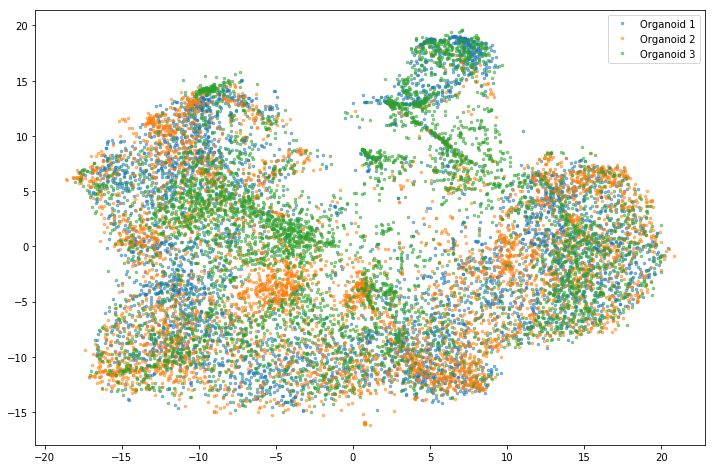

In [9]:
fig = plt.figure(figsize=(12, 8))
for i in range(3):
    idx = np.where(organoid == i + 1)[0]
    plt.plot(x_tsne[idx, 0], x_tsne[idx, 1], '.', alpha=0.5, markersize=5, label=f'Organoid {i+1}')
plt.legend()
plt.show()
fig.savefig('tsne_3orgs_cytoarchitecture.png')

In [17]:
labels = np.load(os.path.join(working_dir, 'cyto_labels_combined.npy'))
labels.shape

(15000,)

In [27]:
clusters = ['Non-proximal', 'SOX2 adjacent', 'TBR1 adjacent', 'Intermediates']
clusters = list(range(8))
for i in range(3):
    idx = np.where(organoid == i + 1)[0]
    lbls = labels[idx]
    n = len(lbls)
    print(f'Organoid {i+1}')
    for j in range(8):
        count = len(np.where(lbls == j)[0])
        print(f'Cluster {clusters[j]}: {count / n * 100:4.1f}%')
    print('')

Organoid 1
Cluster 0: 16.2%
Cluster 1:  3.5%
Cluster 2: 28.0%
Cluster 3: 18.2%
Cluster 4:  0.5%
Cluster 5:  6.0%
Cluster 6: 21.5%
Cluster 7:  6.0%

Organoid 2
Cluster 0: 18.2%
Cluster 1: 15.7%
Cluster 2: 21.5%
Cluster 3: 20.1%
Cluster 4:  0.1%
Cluster 5:  1.5%
Cluster 6: 21.6%
Cluster 7:  1.2%

Organoid 3
Cluster 0: 11.7%
Cluster 1: 19.9%
Cluster 2: 23.3%
Cluster 3: 11.0%
Cluster 4:  1.8%
Cluster 5: 10.3%
Cluster 6: 16.5%
Cluster 7:  5.6%

